WeatherPy

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a list to store city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and API key
    city_url = f"{base_url}q={city}&appid={weather_api_key}"

    # Log the record and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Increment the record count
    record_count += 1

    # Run an API request for each city
    try:
        # Send API request and get response
        response = requests.get(city_url)
        response.raise_for_status() # Check for any errors in the response

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except requests.exceptions.HTTPError as err:
        print(f"City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | el reno
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | yeed
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | okha
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | homer
Processing Record 11 of Set 1 | chifeng
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | taltal
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set 1 

Processing Record 43 of Set 4 | lerwick
Processing Record 44 of Set 4 | hawera
Processing Record 45 of Set 4 | bredasdorp
Processing Record 46 of Set 4 | cooper's town
Processing Record 47 of Set 4 | keflavik
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | kisangani
Processing Record 0 of Set 5 | kamaishi
Processing Record 1 of Set 5 | vorgashor
Processing Record 2 of Set 5 | dunbar
Processing Record 3 of Set 5 | chinde
Processing Record 4 of Set 5 | korla
Processing Record 5 of Set 5 | vadso
Processing Record 6 of Set 5 | xilin hot
Processing Record 7 of Set 5 | takai
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set 5 | siwa oasis
Processing Record 10 of Set 5 | usinsk
Processing Record 11 of Set 5 | kodiak
Processing Record 12 of Set 5 | malpe
Processing Record 13 of Set 5 | ancud
Processing Record 14 of Set 5 | elwood
Processing Record 15 of Set 5 | xining
Processing Record 16 of Set 5 | barcelos
Processing Record 17 of Set 5 | as sulayyi

Processing Record 35 of Set 8 | canutama
Processing Record 36 of Set 8 | sumbe
Processing Record 37 of Set 8 | bauchi
Processing Record 38 of Set 8 | ola
Processing Record 39 of Set 8 | corumba
Processing Record 40 of Set 8 | darwha
Processing Record 41 of Set 8 | malvan
Processing Record 42 of Set 8 | divrigi
Processing Record 43 of Set 8 | bergerac
Processing Record 44 of Set 8 | atherton
Processing Record 45 of Set 8 | las lomitas
Processing Record 46 of Set 8 | obidos
Processing Record 47 of Set 8 | boundiali
Processing Record 48 of Set 8 | iskateley
Processing Record 49 of Set 8 | okahao
Processing Record 0 of Set 9 | rawatsar
Processing Record 1 of Set 9 | liman
Processing Record 2 of Set 9 | domazlice
Processing Record 3 of Set 9 | tenenkou
Processing Record 4 of Set 9 | aykhal
Processing Record 5 of Set 9 | bardai
Processing Record 6 of Set 9 | kavaratti
Processing Record 7 of Set 9 | labrador city
Processing Record 8 of Set 9 | sarangani
Processing Record 9 of Set 9 | antsiran

Processing Record 26 of Set 12 | luwuk
Processing Record 27 of Set 12 | luau
Processing Record 28 of Set 12 | makokou
Processing Record 29 of Set 12 | port douglas
Processing Record 30 of Set 12 | safi
Processing Record 31 of Set 12 | praid
Processing Record 32 of Set 12 | parnu
Processing Record 33 of Set 12 | taro
Processing Record 34 of Set 12 | yarmouth
Processing Record 35 of Set 12 | nueva helvecia
Processing Record 36 of Set 12 | orange
Processing Record 37 of Set 12 | pandan
Processing Record 38 of Set 12 | tsiombe
Processing Record 39 of Set 12 | naze
Processing Record 40 of Set 12 | alo
Processing Record 41 of Set 12 | castillos
Processing Record 42 of Set 12 | slave lake
Processing Record 43 of Set 12 | tofol
Processing Record 44 of Set 12 | dosso
Processing Record 45 of Set 12 | aswan
Processing Record 46 of Set 12 | katsuren-haebaru
Processing Record 47 of Set 12 | kerikeri
Processing Record 48 of Set 12 | barra de santo antonio
Processing Record 49 of Set 12 | nelson bay


In [4]:
# Assuming that `city_data` list contains the weather data for each city
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,el reno,35.5323,-97.9550,291.51,23,0,3.09,US,1682281674
1,remire-montjoly,4.9167,-52.2667,299.17,89,75,2.57,GF,1682281662
2,yeed,4.5500,43.0333,300.26,68,100,3.08,SO,1682281674
3,afaahiti,-17.7500,-149.2833,300.08,85,100,7.98,PF,1682281608
4,vila velha,-20.3297,-40.2925,297.12,89,75,2.57,BR,1682281450


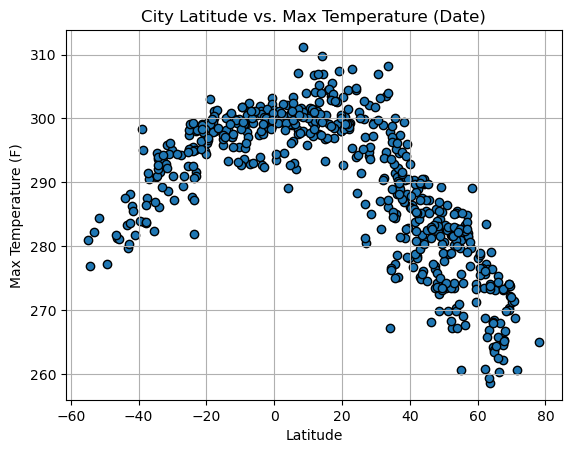

In [7]:
import matplotlib.pyplot as plt

# Extract data for latitude and max temperature from city_data list
latitudes = [city['Lat'] for city in city_data]
max_temps = [city['Max Temp'] for city in city_data]

# Build scatter plot
plt.scatter(latitudes, max_temps, marker='o', edgecolors='black')

# Set plot title and labels
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


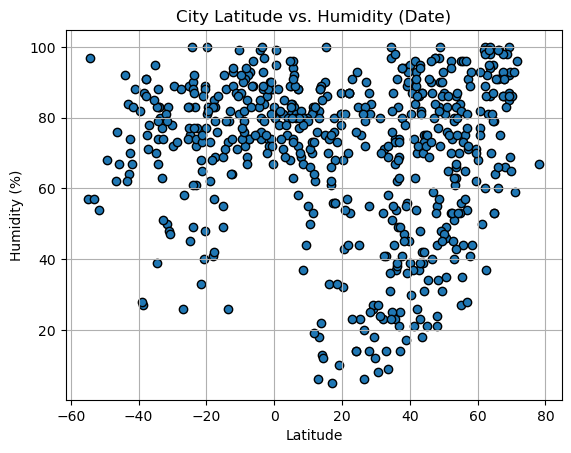

In [8]:
import matplotlib.pyplot as plt

# Extract data for latitude and humidity from city_data list
latitudes = [city['Lat'] for city in city_data]
humidities = [city['Humidity'] for city in city_data]

# Build scatter plot
plt.scatter(latitudes, humidities, marker='o', edgecolors='black')

# Set plot title and labels
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


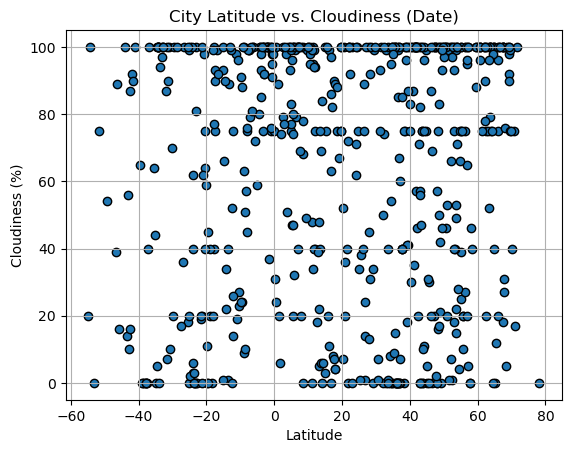

In [9]:
import matplotlib.pyplot as plt

# Extract data for latitude and cloudiness from city_data list
latitudes = [city['Lat'] for city in city_data]
cloudiness = [city['Cloudiness'] for city in city_data]

# Build scatter plot
plt.scatter(latitudes, cloudiness, marker='o', edgecolors='black')

# Set plot title and labels
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


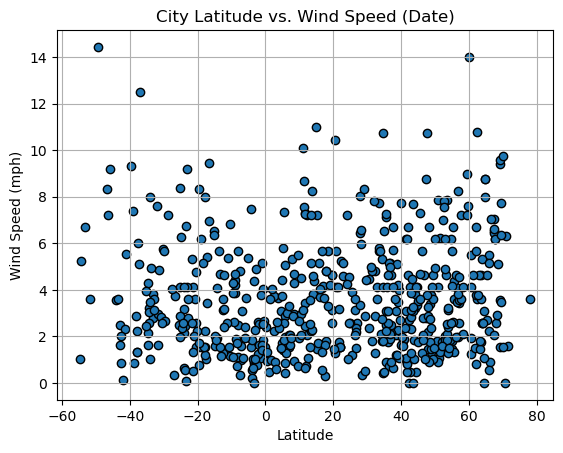

In [10]:
import matplotlib.pyplot as plt

# Extract data for latitude and wind speed from city_data list
latitudes = [city['Lat'] for city in city_data]
wind_speeds = [city['Wind Speed'] for city in city_data]

# Build scatter plot
plt.scatter(latitudes, wind_speeds, marker='o', edgecolors='black')

# Set plot title and labels
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()